In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# Load your original data (no need to parse dates or set index)
import os
import random

def get_filenames_from_folder(folder_path):
    try:
        filenames = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        return filenames
    except FileNotFoundError:
        print(f"Folder not found: {folder_path}")
        return []
    except Exception as e:
        print(f"Error reading folder: {e}")
        return []

households =  get_filenames_from_folder("/kaggle/input/newyorkelectricity/NY")
choice = random.choice(households)
df = pd.read_csv("/kaggle/input/newyorkelectricity/NY/" + choice)

print("Household : " , choice)
df

Household :  USA_NY_Niagara.Falls.Intl.AP.725287_TMY3_HIGH.csv


,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly)
0,01/01 01:00:00,1.444410,17.091715,0.0,16.642609,0.0,0.468681,0.468681,0.468681,0.259136,0.059050,0.122837,0.511307
1,01/01 02:00:00,1.260082,17.291741,0.0,16.951326,0.0,0.477319,0.477319,0.477319,0.151163,0.034446,0.102976,0.470779
2,01/01 03:00:00,1.195319,17.625268,0.0,17.314769,0.0,0.487524,0.487524,0.487524,0.107973,0.024604,0.086497,0.465321
3,01/01 04:00:00,1.185112,17.864573,0.0,17.546215,0.0,0.494019,0.494019,0.494019,0.107973,0.024604,0.076346,0.458771
4,01/01 05:00:00,1.183614,18.028697,0.0,17.624974,0.0,0.496233,0.496233,0.496233,0.107973,0.024604,0.089962,0.441441
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,3.059245,10.652651,0.0,9.260922,0.0,0.260702,0.260702,0.260702,1.251000,0.285068,0.425376,0.813697
8756,12/31 21:00:00,2.907700,10.677459,0.0,9.385016,0.0,0.264198,0.264198,0.264198,1.139304,0.259616,0.379510,0.841671
8757,12/31 22:00:00,2.641980,10.301381,0.0,9.145906,0.0,0.257462,0.257462,0.257462,0.960589,0.218892,0.359615,0.822021
8758,12/31 23:00:00,2.167130,10.369457,0.0,9.430898,0.0,0.265468,0.265468,0.265468,0.714857,0.162896,0.289155,0.711354


In [3]:
# cols = list(df.columns)
# df.drop(cols[3], axis=1, inplace=True)

# len(df.columns)


In [4]:

# Generate the desired datetime index (hourly for 2012)
full_index = pd.date_range(start="2012-01-01 01:00", end="2012-12-31 00:00", freq="h")

# Create an empty DataFrame with the full datetime index
aligned_df = pd.DataFrame(index=full_index)

# Assign your data into the empty DataFrame by position
for i, col in enumerate(df.columns):
    aligned_df[col] = pd.Series(df[col].values, index=full_index[:len(df)])

aligned_df.index.name = "date"
aligned_df.drop('Date/Time', axis=1, inplace=True)

aligned_df.head(50)

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly)
date,,,,,,,,,,,,
2012-01-01 01:00:00,1.444410,17.091715,0.0,16.642609,0.0,0.468681,0.468681,0.468681,0.259136,0.059050,0.122837,0.511307
2012-01-01 02:00:00,1.260082,17.291741,0.0,16.951326,0.0,0.477319,0.477319,0.477319,0.151163,0.034446,0.102976,0.470779
2012-01-01 03:00:00,1.195319,17.625268,0.0,17.314769,0.0,0.487524,0.487524,0.487524,0.107973,0.024604,0.086497,0.465321
2012-01-01 04:00:00,1.185112,17.864573,0.0,17.546215,0.0,0.494019,0.494019,0.494019,0.107973,0.024604,0.076346,0.458771
2012-01-01 05:00:00,1.183614,18.028697,0.0,17.624974,0.0,0.496233,0.496233,0.496233,0.107973,0.024604,0.089962,0.441441
2012-01-01 06:00:00,1.246874,18.241787,0.0,17.463496,0.0,0.491689,0.491689,0.491689,0.107973,0.024604,0.106595,0.492612
2012-01-01 07:00:00,1.556329,18.577356,0.0,17.096985,0.0,0.481362,0.481362,0.481362,0.248338,0.056589,0.177474,0.569165
2012-01-01 08:00:00,2.035673,18.228942,0.0,16.544621,0.0,0.465793,0.465793,0.465793,0.507474,0.115639,0.281086,0.604781
2012-01-01 09:00:00,1.964327,18.226414,0.0,16.586401,0.0,0.466971,0.466971,0.466971,0.485880,0.110719,0.366050,0.511307


In [5]:
aligned_df["OT"] = aligned_df.sum(axis=1)

aligned_df.head(10)

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),OT
date,,,,,,,,,,,,,
2012-01-01 01:00:00,1.444410,17.091715,0.0,16.642609,0.0,0.468681,0.468681,0.468681,0.259136,0.059050,0.122837,0.511307,37.537106
2012-01-01 02:00:00,1.260082,17.291741,0.0,16.951326,0.0,0.477319,0.477319,0.477319,0.151163,0.034446,0.102976,0.470779,37.694470
2012-01-01 03:00:00,1.195319,17.625268,0.0,17.314769,0.0,0.487524,0.487524,0.487524,0.107973,0.024604,0.086497,0.465321,38.282323
2012-01-01 04:00:00,1.185112,17.864573,0.0,17.546215,0.0,0.494019,0.494019,0.494019,0.107973,0.024604,0.076346,0.458771,38.745650
2012-01-01 05:00:00,1.183614,18.028697,0.0,17.624974,0.0,0.496233,0.496233,0.496233,0.107973,0.024604,0.089962,0.441441,38.989964
2012-01-01 06:00:00,1.246874,18.241787,0.0,17.463496,0.0,0.491689,0.491689,0.491689,0.107973,0.024604,0.106595,0.492612,39.159008
2012-01-01 07:00:00,1.556329,18.577356,0.0,17.096985,0.0,0.481362,0.481362,0.481362,0.248338,0.056589,0.177474,0.569165,39.726323
2012-01-01 08:00:00,2.035673,18.228942,0.0,16.544621,0.0,0.465793,0.465793,0.465793,0.507474,0.115639,0.281086,0.604781,39.715595
2012-01-01 09:00:00,1.964327,18.226414,0.0,16.586401,0.0,0.466971,0.466971,0.466971,0.485880,0.110719,0.366050,0.511307,39.652009


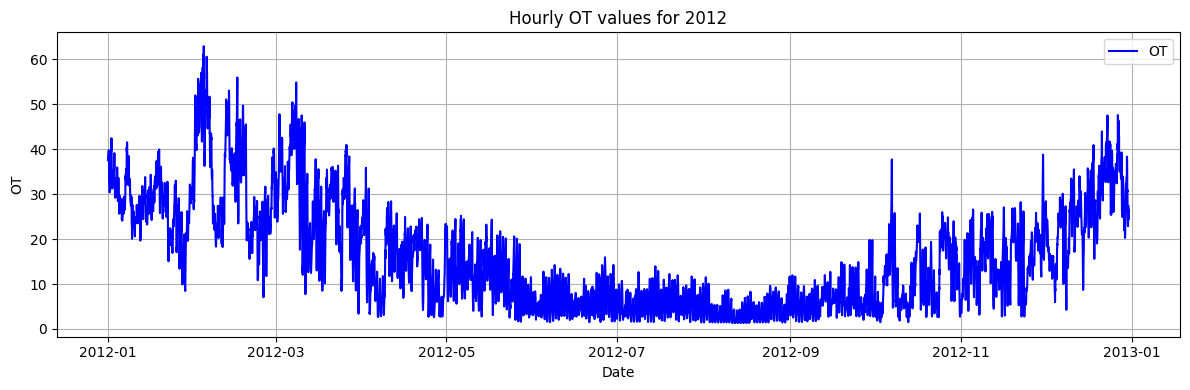

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the 'OT' column as a NumPy array
ot_values = aligned_df["OT"].to_numpy()
dates = aligned_df.index.to_numpy()  # This will be a NumPy datetime64 array

# Plot
plt.figure(figsize=(12, 4))
plt.plot(dates, ot_values, label="OT", color="blue")
plt.xlabel("Date")
plt.ylabel("OT")
plt.title("Hourly OT values for 2012")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

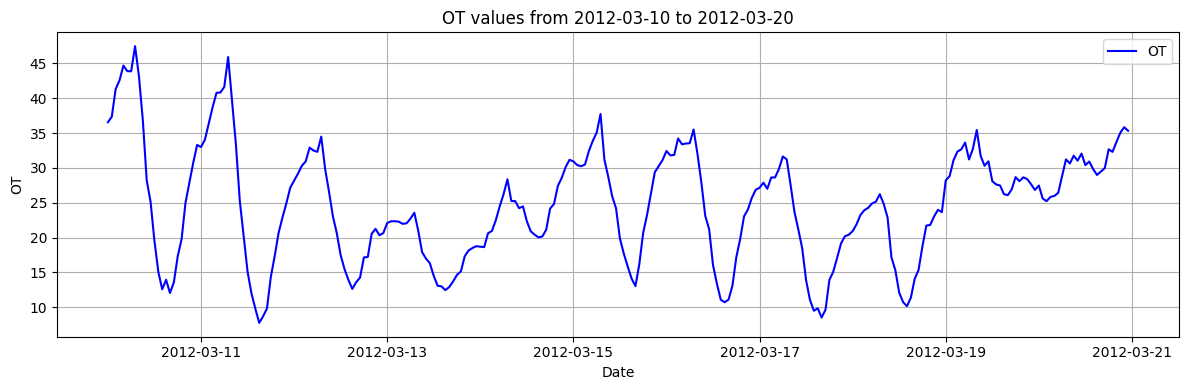

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define your time range (change as needed)
start_date = "2012-03-10"
end_date   = "2012-03-20"

# Slice the DataFrame by date
df_slice = aligned_df.loc[start_date:end_date]

# Extract NumPy arrays for plotting
dates = df_slice.index.to_numpy()
ot_values = df_slice["OT"].to_numpy()

# Plot the slice
plt.figure(figsize=(12, 4))
plt.plot(dates, ot_values, label="OT", color="blue")
plt.xlabel("Date")
plt.ylabel("OT")
plt.title(f"OT values from {start_date} to {end_date}")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [8]:
import os

# Define the output directory and filename
output_dir = "/kaggle/working/targetfixed"
output_file = "USA_AL_Anniston.Metro.AP.722287_TMY3_HIGH.csv"
output_path = os.path.join(output_dir, output_file)

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the DataFrame
aligned_df.to_csv(output_path)

In [9]:
import argparse
import os
import torch
import sys
sys.path.append('/kaggle/input/dlinear/pytorch/dlinearwithtrues/5/DLinear')
from exp.exp_main import Exp_Main
import random
import numpy as np

class Args(argparse.Namespace):
    def __init__(self):
        super().__init__()

        # Model configuration
        self.is_training = 1
        self.model_id = 'h_test'
        self.model = 'DLinear'
        
        # Data loader configuration
        self.data = 'custom'
        self.root_path = output_dir
        self.data_path = output_file
        self.features = 'S'  # options: [M, S, MS]
        self.target = 'OT'
        self.freq = 'h'  # options: [s, t, h, d, b, w, m]
        self.checkpoints = '/kaggle/working/checkpoints/'
        
        # Forecasting task configuration
        self.seq_len = 6
        self.label_len = 6
        self.pred_len = 6
        
        # DLinear configuration
        self.individual = False
        
        # Formers configuration
        self.embed_type = 0
        self.enc_in = 12
        self.dec_in = 7
        self.c_out = 7
        self.d_model = 512
        self.n_heads = 8
        self.e_layers = 2
        self.d_layers = 1
        self.d_ff = 2048
        self.moving_avg = 25
        self.factor = 1
        self.distil = True
        self.dropout = 0.05
        self.embed = 'timeF'  # options: [timeF, fixed, learned]
        self.activation = 'gelu'
        self.output_attention = False
        self.do_predict = False
        
        # Optimization configuration
        self.num_workers = 1
        self.itr = 3
        self.train_epochs = 100
        self.batch_size = 32
        self.patience = 3
        self.learning_rate = 0.0001
        self.des = 'test'
        self.loss = 'mae'  # loss function
        self.lradj = 'type1'
        self.use_amp = False
        
        # GPU configuration
        self.use_gpu = True
        self.gpu = 0
        self.use_multi_gpu = False
        self.devices = '0,1,2,3'
        self.test_flop = False

    # Optional: Add any methods if needed to manipulate or print out the configuration

# Example usage:
args = Args()

# import multiprocessing
# multiprocessing.set_start_method('spawn', force=True)

args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.dvices = args.devices.replace(' ', '')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]



Exp = Exp_Main
results_output_name = []
search_space = [6, 12, 24]

if args.is_training:
    for ii in range(args.itr):
        # setting record of experiments
        setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
            str(search_space[ii]) + args.model_id,
            args.model,
            args.data,
            args.features,
            search_space[ii] * 8,
            search_space[ii],
            search_space[ii],
            args.d_model,
            args.n_heads,
            args.e_layers,
            args.d_layers,
            args.d_ff,
            args.factor,
            args.embed,
            args.distil,
            args.des, ii)

        results_output_name.append(setting)

        args.seq_len = search_space[ii] * 8
        args.label_len = search_space[ii]
        args.pred_len = search_space[ii]

        print('Args in experiment:')
        print(args)
        
        exp = Exp(args)  # set experiments
        print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
        exp.train(setting)

        print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
        exp.test(setting)

        if args.do_predict:
            print('>>>>>>>predicting : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
            exp.predict(setting, True)

        torch.cuda.empty_cache()
else:
    ii = 0
    setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(args.model_id,
                                                                                                  args.model,
                                                                                                  args.data,
                                                                                                  args.features,
                                                                                                  args.seq_len,
                                                                                                  args.label_len,
                                                                                                  args.pred_len,
                                                                                                  args.d_model,
                                                                                                  args.n_heads,
                                                                                                  args.e_layers,
                                                                                                  args.d_layers,
                                                                                                  args.d_ff,
                                                                                                  args.factor,
                                                                                                  args.embed,
                                                                                                  args.distil,
                                                                                                  args.des, ii)

    exp = Exp(args)  # set experiments
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting, test=1)
    torch.cuda.empty_cache()


Args in experiment:
Args(is_training=1, model_id='h_test', model='DLinear', data='custom', root_path='/kaggle/working/targetfixed', data_path='USA_AL_Anniston.Metro.AP.722287_TMY3_HIGH.csv', features='S', target='OT', freq='h', checkpoints='/kaggle/working/checkpoints/', seq_len=48, label_len=6, pred_len=6, individual=False, embed_type=0, enc_in=12, dec_in=7, c_out=7, d_model=512, n_heads=8, e_layers=2, d_layers=1, d_ff=2048, moving_avg=25, factor=1, distil=True, dropout=0.05, embed='timeF', activation='gelu', output_attention=False, do_predict=False, num_workers=1, itr=3, train_epochs=100, batch_size=32, patience=3, learning_rate=0.0001, des='test', loss='mae', lradj='type1', use_amp=False, use_gpu=True, gpu=0, use_multi_gpu=False, devices='0,1,2,3', test_flop=False)
Use GPU: cuda:0
>>>>>>>start training : 6h_test_DLinear_custom_ftS_sl48_ll6_pl6_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_test_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 6955
val 871
test 871
	iters: 100, epoch: 1 | loss: 0.2147

In [10]:
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the base folder
base_folder = "/kaggle/working/results/"

# Build paths
for i in range(len(results_output_name)):
    pred_path = os.path.join(base_folder, results_output_name[i], "pred.npy")
    true_path = os.path.join(base_folder, results_output_name[i], "true.npy")
    
    # Load and squeeze (remove last dimension since it's 1)
    pred = np.load(pred_path).squeeze(-1)  # Shape: (768, 6)
    true = np.load(true_path).squeeze(-1)  # Shape: (768, 6)
    
    print("Prediction shape:", pred.shape)
    print("Ground truth shape:", true.shape)
    
    # Sanity check
    assert pred.shape == true.shape, "Shape mismatch between prediction and ground truth"
    
    # Plot comparison for a few samples
    num_samples_to_plot = 5
    plt.figure(figsize=(12, 8))
    
    for i in range(num_samples_to_plot):
        plt.subplot(num_samples_to_plot, 1, i + 1)
        plt.plot(true[i], label="Ground Truth", color="black")
        plt.plot(pred[i], linestyle="--", label="Prediction", color="blue")
        plt.ylabel(f"Sample {i}")
        if i == 0:
            plt.legend()
        plt.grid(True)
    
    plt.xlabel("Prediction Step")
    plt.suptitle("Prediction vs Ground Truth")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


Prediction shape: (864, 6)
Ground truth shape: (864, 6)
Prediction shape: (864, 12)
Ground truth shape: (864, 12)
Prediction shape: (832, 24)
Ground truth shape: (832, 24)
